# Decision Trees on Diabetes Data in Python

### Data Preparation
### 768 Females of Pima Indian Heritage

We have 768 instances and the following 8 attributes:

    Number of times pregnant (preg)
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)
    Diastolic blood pressure in mm Hg (pres)
    Triceps skin fold thickness in mm (skin)
    2-Hour serum insulin in mu U/ml (insu)
    Body mass index measured as weight in kg/(height in m)^2 (mass)
    Diabetes pedigree function (pedi)
    Age in years (age)
    Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

### https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

In [37]:
# Display current version of Python and scikit-learn
import sys
import sklearn
print("Python version is {}.".format(sys.version))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Python version is 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)].
The scikit-learn version is 0.23.2.


###  Data Exploration

In [38]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

In [39]:
# Importing the Dataset
column_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes =pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=column_names)

In [40]:
# Preview dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Splicing
#### Data Splicing is the process of splitting the data into a training set and a testing set. The training set is used to build the Decision Tree model and the testing set is used to validate the efficiency of the model. 

In [42]:
# split dataset in features and target variable
X = diabetes.drop('Outcome', axis=1)  # Features
y = diabetes['Outcome'] # Target variable

In [43]:
# Training and Making Predictions
#  Let’s divide the data into training & testing sets in the ratio of 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Create Decision Tree classifier object
classifier = DecisionTreeClassifier()   # by-default the criterion parameters is set to ‘gini’,
# Train Decision Tree Classifier
classifier.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [44]:
# Evaluating the Algorithm
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:",)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Confusion Matrix:
[[86 24]
 [18 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       110
           1       0.52      0.59      0.55        44

    accuracy                           0.73       154
   macro avg       0.67      0.69      0.68       154
weighted avg       0.74      0.73      0.73       154

Accuracy: 0.7272727272727273


#### From the confusion matrix, you can see that out of 154 test instances, This is 72.7 % accuracy

In [45]:
# evaluate the cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.15)


### Visualizing Decision Tree

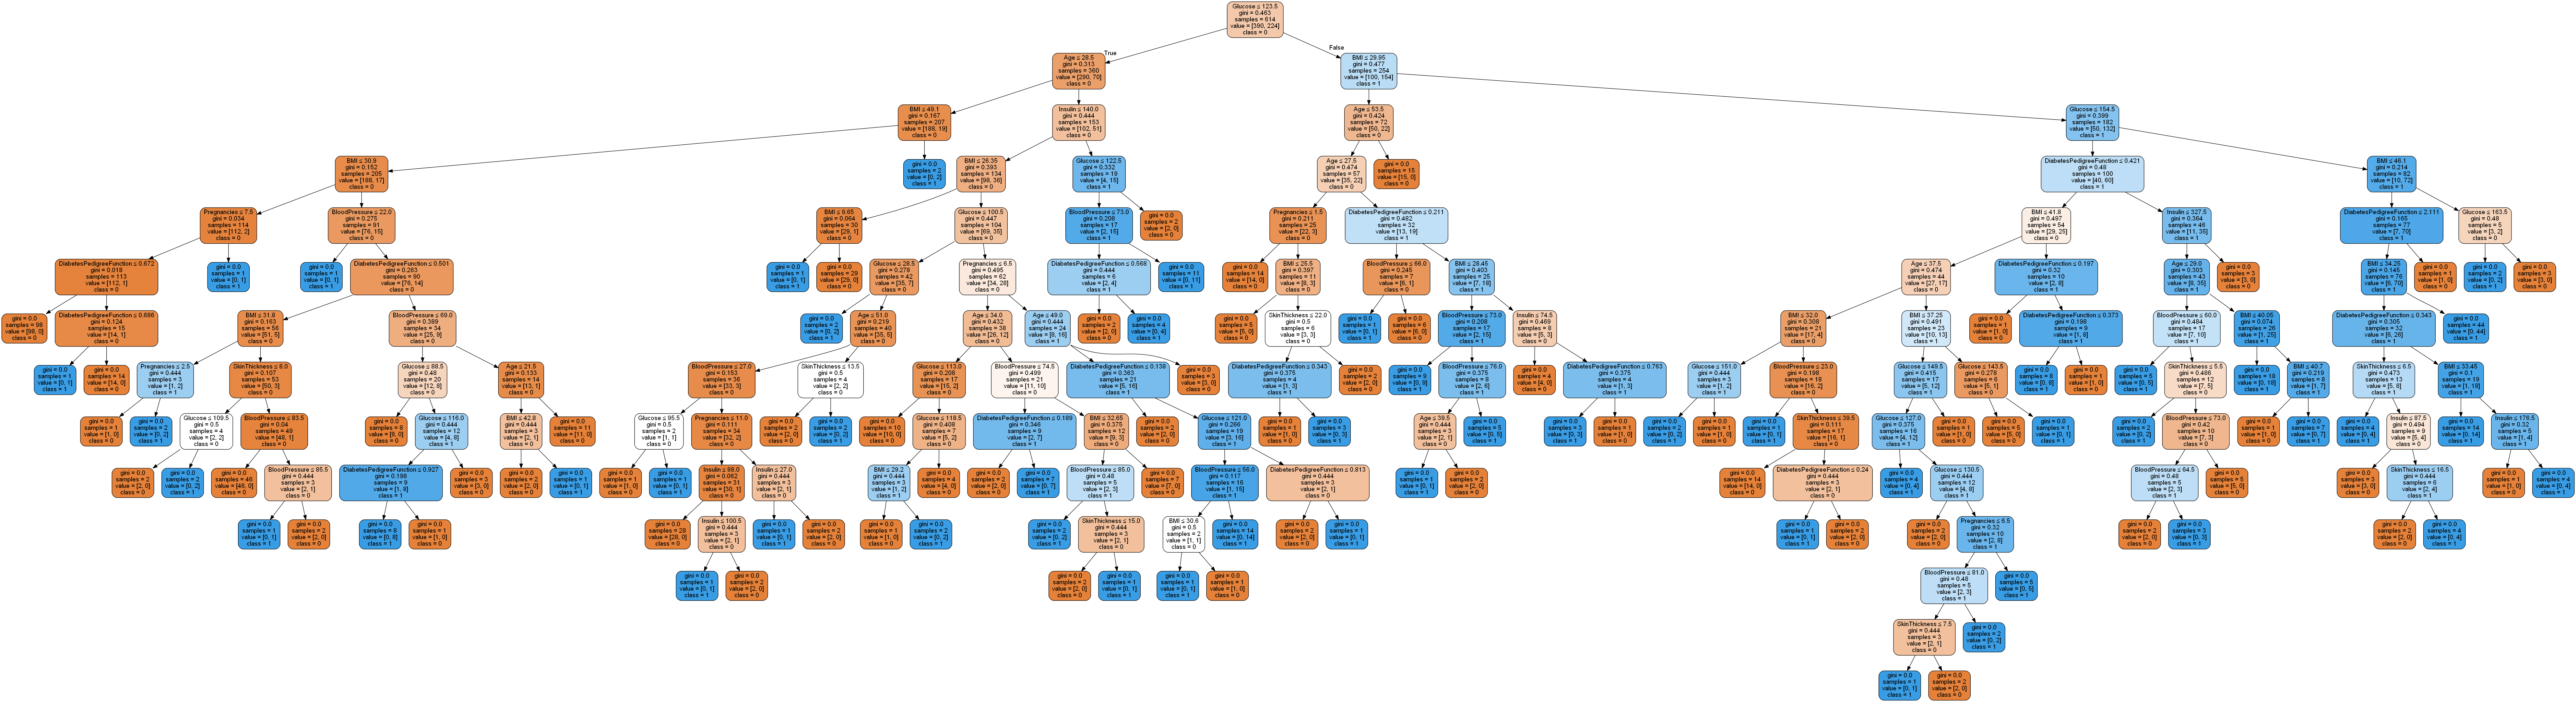

In [46]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus    # conda install -c conda-forge pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = list(X.columns.values),class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())

#### In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. 
#### You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

#### Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand.

In [47]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7467532467532467


#### In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning.
#### Maximum depth of the tree can be used as a control variable for pre-pruning. 
#### In the above the example, you can plot a decision tree on the same data with max_depth=3 and criterion="entropy"

#### the classification rate increased to 74.7%, which is better accuracy than the previous model.

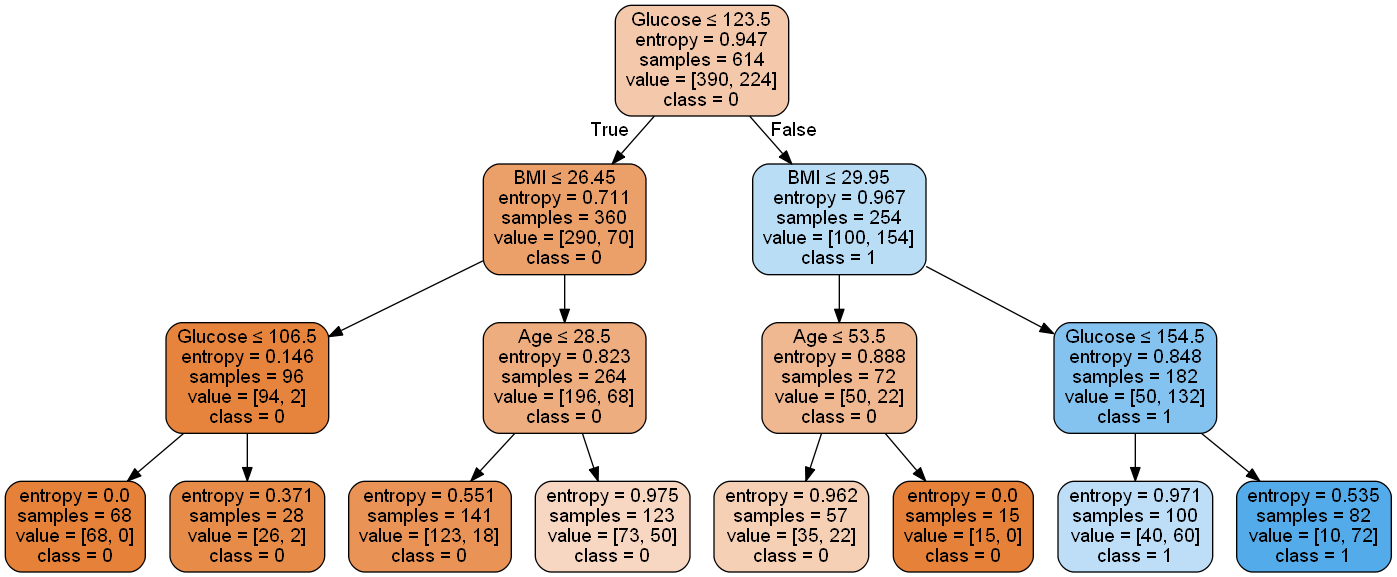

In [48]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = list(X.columns.values),class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree2.png')  # export as image
Image(graph.create_png())   # show image
#graph.write_pdf("Pima_diabetes_Tree2.pdf")  # export as pdf format


In [49]:
from sklearn.tree import export_text
rules = export_text(clf, feature_names=list(X.columns.values))
print(rules)
with open('out.txt', 'w') as f:
    print(rules, file=f)

|--- Glucose <= 123.50
|   |--- BMI <= 26.45
|   |   |--- Glucose <= 106.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  106.50
|   |   |   |--- class: 0
|   |--- BMI >  26.45
|   |   |--- Age <= 28.50
|   |   |   |--- class: 0
|   |   |--- Age >  28.50
|   |   |   |--- class: 0
|--- Glucose >  123.50
|   |--- BMI <= 29.95
|   |   |--- Age <= 53.50
|   |   |   |--- class: 0
|   |   |--- Age >  53.50
|   |   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- Glucose <= 154.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  154.50
|   |   |   |--- class: 1



In [50]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'criterion':['gini','entropy'], 'max_depth' :[3,5,7,20]}
grid_search = GridSearchCV(classifier,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.cv_results_['params']

[{'criterion': 'gini', 'max_depth': 3},
 {'criterion': 'gini', 'max_depth': 5},
 {'criterion': 'gini', 'max_depth': 7},
 {'criterion': 'gini', 'max_depth': 20},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 20}]

In [51]:
grid_search.cv_results_['mean_test_score']

array([0.71993869, 0.6906704 , 0.70363854, 0.69870718, 0.74755431,
       0.68408637, 0.68088764, 0.70041317])

In [52]:
grid_search.best_estimator_         #to find the best combination of these parameters

DecisionTreeClassifier(criterion='entropy', max_depth=3)